# Dynamics of scalar-modulated system

Dynamics equation:

$\dot{x}(x, t) = u(t)w(x) + v_0(x); \;\; x(0) = 0$

Goal: stabilize arbitrary increasing trajectory $x^*(t); \;  x^*(0) = 0$.

## Sufficient conditions for stability

1. $dx^*/dt(t) \equiv v^*(t) = \dot{x}(x^*(t), t) = u(t)w(x^*(t)) + v_0(x^*(t))$ for all $t$.
2. $\dot{x}(x^*(t) + \Delta, t) = u(t)w(x^*(t) + \Delta) + v_0(x^*(t) + \Delta) \leq v^*(t)$... i.e. advanced trajectories slow down.
3. $\dot{x}(x^*(t) - \Delta, t) = u(t)w(x^*(t) - \Delta) + v_0(x^*(t) - \Delta) \geq v^*(t)$... i.e. delayed trajectories speed up.

## Candidate recipe for stabilizing through scalar modulation:

Choose $u(t)$ fluctuating approx on timescale of expected timing errors to correct.

Pick any $w(x^*(t))$ same sign as $du/dt(t)$ for all $t$.

Pick $v_0(x^*(t))$ s.t. $\dot{x}^*(t) = u(t)w(x^*(t)) + v_0(x^*(t))$ for all $t$.

# Diagram

Consider time $t$. For a constant speed attractor sequence, correct position is $x^*(t) = v^*t$.

Thus, 

$$\dot x(v^*t, t) = u(t)w(v^*t) + v_0(v^*t) = v^*.$$

For each $t$ we want to choose $w(x=v^*t)$ and $v_0(x=v^*t)$, given $u(t)$. The equation we have is:

$$v_0(v^*t) = v^* - u(t)w(v^*t)$$

Now plot $v_0$ vs $w$ for a few different u(t). Solutions for $w$ and $v_0$ are given on the line, whose slope is -$u(t)$.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d as smooth
import sys

from aux import Generic, get_idx
from disp import set_font_size

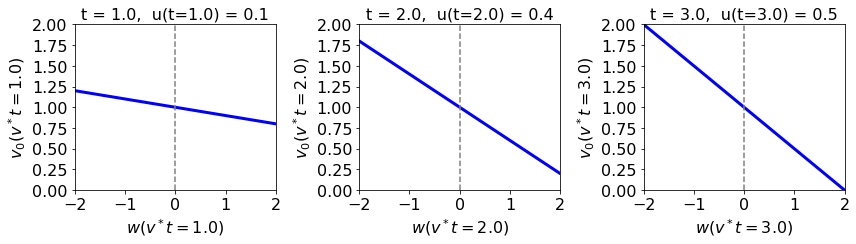

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)

v_star = 1
ts = np.array([1., 2., 3.])
u_ts = np.array([.1, .4, .5])

rw = np.linspace(-2, 2, 101)

for u_t, t, ax in zip(u_ts, ts, axs):
    ax.plot(rw, v_star - u_t*rw, c='b', lw=3)
    ax.set_xlabel(f'$w(v^*t={v_star*t})$')
    ax.set_ylabel(f'$v_0(v^*t={v_star*t})$')
    ax.set_title(f't = {t},  u(t={t}) = {u_t}')

for ax in axs:
    ax.set_xlim(-2, 2)
    ax.set_ylim(0, 2*v_star)
    ax.axvline(0, ls='--', color='gray')
    set_font_size(ax, 16)

To construct the functions $w(x)$ and $v_0(x)$, we loop over all $t$ and fill in $w(v^*t)$ and $v_0(v^*t)$ by choosing a solution on the line specified by $u(t)$. But which $w$ and $v_0$ do we choose at each $t$, since there are infinitely many solutions on the line?

To answer this we consider the stabilization criteria. If at time $t$ a sequence is not at the target position $x^*(t) \equiv v^*t$, i.e. its true position $x(t) \neq v^*t$, then it should increase its speed to $v(t) > v^*$ if $x(t) < v^*t$ (to catch up) and decrease its speed to $v(t) < v^*$ if $x(t) > v^*t$ (to slow down). Its speed at $t$ is given by $v(t) \equiv \dot x(x(t), t) = u(t)w(x(t)) + v_0(x(t))$. I.e. it feels the $w$ and $v_0$ at different position modulated by $u(t)$.

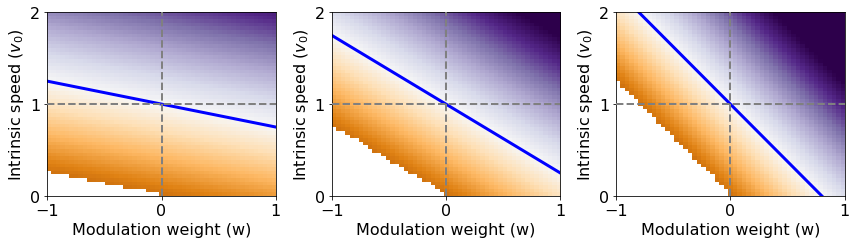

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)

for u_t, label, ax in zip([.25, .75, 1.25], ['b', 'c', 'd'], axs):

    r2w = np.tile(np.linspace(-1, 1, 51)[:, None], (1, 51))
    r2v0 = np.tile(np.linspace(0, 2, 51)[None, :], (51, 1))

    v_t = u_t*r2w + r2v0
    v_t[v_t < 0] = np.nan

    ax.matshow(v_t.T, origin='lower', extent=[-1, 1, 0, 2], vmin=-.5, vmax=2.5, cmap='PuOr')
    ax.plot([-1, 1], 1 - u_t*np.array([-1, 1]), lw=3, c='b')
    ax.xaxis.tick_bottom()
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(['0', '1', '2'])
    ax.set_ylim(0, 2)
    ax.set_xlabel('Modulation weight (w)')
    ax.set_ylabel('Intrinsic speed ($v_0$)')
    ax.set_aspect('auto')

    ax.axvline(0, lw=2, ls='--', color='gray', zorder=10)
    ax.axhline(1, lw=2, ls='--', color='gray', zorder=10)

    set_font_size(ax, 16)

# fig.savefig(f'ms/3b.svg')

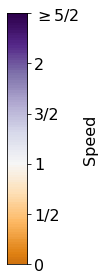

In [4]:
v = np.linspace(0, 2.5, 101)[:, None]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.matshow(v, origin='lower', extent=[0, .2, 0, 2.5], vmin=-.5, vmax=2.5, cmap='PuOr')
ax.xaxis.set_visible(False)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5])
ax.set_yticklabels(['0', '1/2', '1', '3/2', '2', '$\geq$5/2'])
ax.set_ylabel('Speed')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

set_font_size(ax, 16)

# fig.savefig('ms/3bCB.svg')

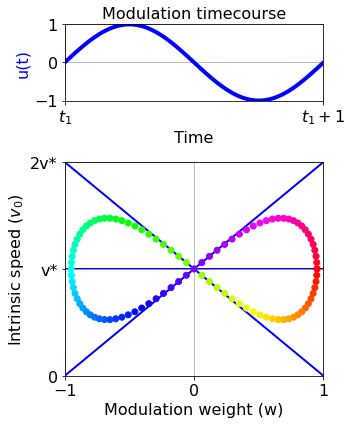

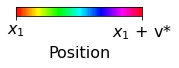

In [5]:
t = np.linspace(0, 1, 101)
u = np.sin(2*np.pi*t)

gs = gridspec.GridSpec(3, 1)

fig = plt.figure(figsize=(5, 6), tight_layout=True)
axs = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1:])]

axs[0].plot(t, u, lw=4, c='b')
axs[0].set_xlim(0, 1)
axs[0].set_ylim(-1, 1)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['$t_1$', '$t_1 + 1$'])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('u(t)', color='b')
axs[0].set_title('Modulation timecourse')
axs[0].grid()

w_1 = .95*np.cos(2*np.pi*t)
v0_1 = 1 - u*w_1

axs[1].scatter(w_1, v0_1, c=t, cmap='hsv', vmin=0, vmax=1, zorder=100)

axs[1].plot([-1, 1], [2, 0], lw=2, c='b', zorder=0)
axs[1].plot([-1, 1], [0, 2], lw=2, c='b', zorder=0)
axs[1].plot([-1, 1], [1, 1], lw=2, c='b', zorder=0)
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(0, 2)
axs[1].set_xticks([-1, 0, 1])
axs[1].set_yticks([0, 1, 2])
axs[1].set_yticklabels(['0', 'v*', '2v*'])

axs[1].set_xlabel('Modulation weight (w)')
axs[1].set_ylabel('Intrinsic speed ($v_0$)')
axs[1].grid()

for ax in axs:
    set_font_size(ax, 16)
    
# fig.savefig('ms/3d.svg')

fig, ax = plt.subplots(1, 1, figsize=(4, 1), tight_layout=True)

r2t = np.linspace(0, 1, 101)[None, :]
ax.matshow(r2t, extent=[0, 1, 0, .075], cmap='hsv', vmin=0, vmax=1)
ax.set_xlabel('Position')
ax.set_xticks([0, 1])
ax.set_xticklabels(['$x_1$', '$x_1$ + v*'])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 16)

# fig.savefig('ms/3dCB.svg')

# Example

In [6]:
DT = .001
DX = .001

# funcs for getting nearest value

# simulation start times and positions
T_0_X_0 = [
    (0, 0),
    (.5, 0),
    (0, .5),
    (1, 0),
    (0, 1),
    (1.5, 0),
    (0, 1.5),
    (2, 0),
    (0, 2),
    (2.5, 0),
    (0, 2.5),
    (3, 0),
    (0, 3),
]

Sinusoidal modulation:

$x^*(t) = t$

$u(t) = 1 + cos(t)$

$w(x) = -sin(x)$

$v_0(x) = [1 + sin(x)]cos(x)$

In [7]:
T_MAX = 16
X_MAX = 16

T_STOP = 14

np.random.seed(1)

t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)

u_arr = 1 + np.cos(t)
w_arr = -.75*np.sin(x)
v0_arr = 1 - u_arr*w_arr

def u(t_samp):
    return u_arr[get_idx(t_samp, 0, DT, len(t))]

def w(x_samp):
    return w_arr[get_idx(x_samp, 0, DX, len(x))]

def v0(x_samp):
    return v0_arr[get_idx(x_samp, 0, DX, len(x))]


# run simulations
smln = []

for _t_0, _x_0 in T_0_X_0:
    sys.stdout.write(f' t_0 {_t_0:.2f} x_0 {_x_0:.2f},')

    t_trl = np.arange(_t_0, T_STOP, DT)
    x_trl = np.nan * np.zeros(len(t_trl))

    x_trl[0] = _x_0

    for ct, _t in enumerate(t_trl[1:], 1):

        _x = x_trl[ct-1]

        _v = u(_t)*w(_x) + v0(_x)
        x_trl[ct] = _x + _v*DT
        
    smln.append((t_trl.copy(), x_trl.copy()))

 t_0 0.00 x_0 0.00, t_0 0.50 x_0 0.00, t_0 0.00 x_0 0.50, t_0 1.00 x_0 0.00, t_0 0.00 x_0 1.00, t_0 1.50 x_0 0.00, t_0 0.00 x_0 1.50, t_0 2.00 x_0 0.00, t_0 0.00 x_0 2.00, t_0 2.50 x_0 0.00, t_0 0.00 x_0 2.50, t_0 3.00 x_0 0.00, t_0 0.00 x_0 3.00,

Min: 0.026, Max: 1.974, Std: 0.458


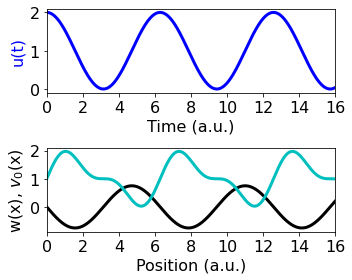

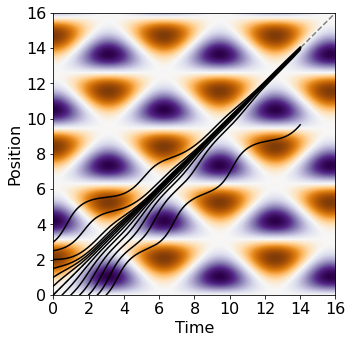

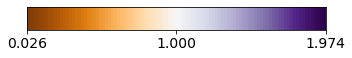

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4), tight_layout=True)

# plot modulation time course
axs[0].plot(t, u(t), c='b', lw=3)
axs[0].set_xlim(0, T_MAX)

axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('u(t)', color='b')

# plot modulation spatial profile
axs[1].plot(x, w(x), c='k', lw=3)
axs[1].plot(x, v0(x), c='c', lw=3)
axs[1].set_xlim(0, X_MAX)
axs[1].set_xlabel('Position (a.u.)')
axs[1].set_ylabel('w(x), $v_0$(x)')

for ax in axs:
    set_font_size(ax, 16)
    
fig.savefig('ms/3c_top.svg')
    
# plot speed landscape and trajectories
fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

t2v = w_arr[:, None] @ u_arr[None, :] + np.tile(v0_arr[:, None], (1, len(t)))
v_diff_u = t2v.max() - 1
v_diff_l = 1 - t2v.min()

if v_diff_u > v_diff_l:
    v_min = 1 - v_diff_u
    v_max = 1 + v_diff_u
else:
    v_min = 1 - v_diff_l
    v_max = 1 + v_diff_l

ax.imshow(t2v, origin='lower', cmap='PuOr', vmin=v_min, vmax=v_max, extent=[0, T_MAX, 0, X_MAX])

ax.plot([0, T_MAX], [0, T_MAX], c='gray', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
print('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))


for t_trl, x_trl in smln:
    
    ax.plot(t_trl, x_trl, c='k')

set_font_size(ax, 16)

fig.savefig('ms/3c_bottom.svg')

fig, ax = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
ax.matshow(np.linspace(v_min, v_max, 100)[None, :], origin='lower', vmin=v_min, vmax=v_max, cmap='PuOr',
           extent=[v_min, v_max, 0, .15])
ax.set_xticks([v_min, 1, v_max])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 14)

fig.savefig('ms/3c_cbar.svg')

In [9]:
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [10]:
# time-averaged dynamical system
T_DY_DT = np.arange(2, 14, DT)
RY = np.arange(-4, 4, DX)

dy_dt = np.nan * np.zeros((len(T_DY_DT), len(RY)))

for ct_, t_ in enumerate(T_DY_DT):
    x_0 = t_
    rx = x_0 + RY
    
    v = u(t_)*w(rx) + v0(rx)
    
    dy_dt[ct_, :] = v - 1

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


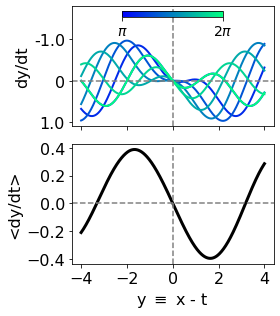

In [11]:
XPL_T = np.linspace(np.pi, 2*np.pi, 7)
cmap = cm.get_cmap('winter')
colors = [cmap(i) for i in np.linspace(0, 1, len(XPL_T))]

fig, axs = plt.subplots(2, 1, figsize=(4, 4.5), sharex=True, tight_layout=True)
for t_, c in zip(XPL_T, colors):
    it = int(round(t_/DT)+2)
    axs[0].plot(RY, dy_dt[it], c=c, lw=2)
    
im = axs[0].scatter([0, 0], [0, 0], c=[0, 1], s=0, cmap='winter')
cax = inset_axes(axs[0], width="50%", height="5%",  loc='upper center')
    
axs[0].axhline(0, ls='--', c='gray')
axs[0].axvline(0, ls='--', c='gray')

axs[0].set_ylim(-1.1, 1.8)
axs[0].set_yticks([-1, 0, 1])
axs[0].set_yticklabels(['1.0', '0', '-1.0'])

axs[0].set_ylabel('dy/dt')

cb = fig.colorbar(im, cax=cax, orientation='horizontal')
cb.set_ticks([0, 1])
cb.set_ticklabels(['$\pi$', '$2\pi$'])
cb.ax.tick_params(labelsize=14)

axs[1].plot(RY, dy_dt.mean(0), lw=3, c='k')

axs[1].axhline(0, ls='--', c='gray')
axs[1].axvline(0, ls='--', c='gray')

axs[1].set_xlabel('y $\equiv$ x - t')
axs[1].set_ylabel('<dy/dt>')

set_font_size(axs, 16)

fig.savefig('ms/3ef.svg')

$$u(t) \sim \textrm{O-U Process}$$

In [12]:
T_MAX = 16
X_MAX = 16

T_STOP = 14

np.random.seed(1)

t = np.arange(0, T_MAX, DT)
x = np.arange(0, X_MAX, DX)

u_arr = smooth(np.random.normal(0, 1, len(t)), .9/DT)
u_arr -= u_arr.min()
u_arr /= (.5*u_arr.max())

w_arr = .65*np.gradient(u_arr, DT)
v0_arr = 1 - u_arr*w_arr

def u(t_samp):
    return u_arr[get_idx(t_samp, 0, DT, len(t))]

def w(x_samp):
    return w_arr[get_idx(x_samp, 0, DX, len(x))]

def v0(x_samp):
    return v0_arr[get_idx(x_samp, 0, DX, len(x))]


# run simulations
smln = []

for _t_0, _x_0 in T_0_X_0:
    sys.stdout.write(f' t_0 {_t_0:.2f} x_0 {_x_0:.2f},')

    t_trl = np.arange(_t_0, T_STOP, DT)
    x_trl = np.nan * np.zeros(len(t_trl))

    x_trl[0] = _x_0

    for ct, _t in enumerate(t_trl[1:], 1):

        _x = x_trl[ct-1]

        _v = u(_t)*w(_x) + v0(_x)
        x_trl[ct] = _x + _v*DT
        
    smln.append((t_trl.copy(), x_trl.copy()))

 t_0 0.00 x_0 0.00, t_0 0.50 x_0 0.00, t_0 0.00 x_0 0.50, t_0 1.00 x_0 0.00, t_0 0.00 x_0 1.00, t_0 1.50 x_0 0.00, t_0 0.00 x_0 1.50, t_0 2.00 x_0 0.00, t_0 0.00 x_0 2.00, t_0 2.50 x_0 0.00, t_0 0.00 x_0 2.50, t_0 3.00 x_0 0.00, t_0 0.00 x_0 3.00,

Min: 0.016, Max: 1.984, Std: 0.225


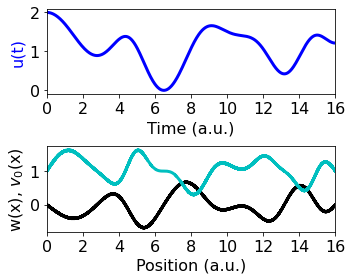

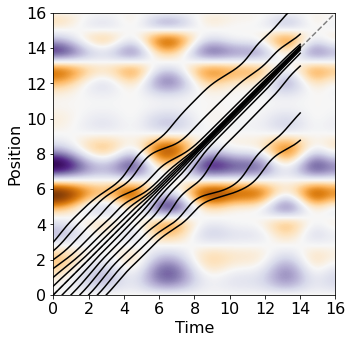

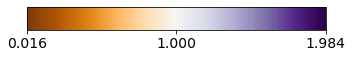

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(5, 4), tight_layout=True)

# plot modulation time course
axs[0].plot(t, u(t), c='b', lw=3)
axs[0].set_xlim(0, T_MAX)

axs[0].set_xlabel('Time (a.u.)')
axs[0].set_ylabel('u(t)', color='b')

# plot modulation spatial profile
axs[1].plot(x, w(x), c='k', lw=3)
axs[1].plot(x, v0(x), c='c', lw=3)
axs[1].set_xlim(0, X_MAX)
axs[1].set_xlabel('Position (a.u.)')
axs[1].set_ylabel('w(x), $v_0$(x)')

for ax in axs:
    set_font_size(ax, 16)
    
fig.savefig('ms/3d_top.svg')
    
# plot speed landscape and trajectories
fig, ax = plt.subplots(1, 1, figsize=(5, 5), tight_layout=True)

t2v = w_arr[:, None] @ u_arr[None, :] + np.tile(v0_arr[:, None], (1, len(t)))
v_diff_u = t2v.max() - 1
v_diff_l = 1 - t2v.min()

if v_diff_u > v_diff_l:
    v_min = 1 - v_diff_u
    v_max = 1 + v_diff_u
else:
    v_min = 1 - v_diff_l
    v_max = 1 + v_diff_l

ax.imshow(t2v, origin='lower', cmap='PuOr', vmin=v_min, vmax=v_max, extent=[0, T_MAX, 0, X_MAX])

ax.plot([0, T_MAX], [0, T_MAX], c='gray', ls='--')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
print('Min: {0:.3f}, Max: {1:.3f}, Std: {2:.3f}'.format(v_min, v_max, t2v.std()))


for t_trl, x_trl in smln:
    
    ax.plot(t_trl, x_trl, c='k')

ax.set_xlim(0, T_MAX)
ax.set_ylim(0, X_MAX)
set_font_size(ax, 16)

fig.savefig('ms/3d_bottom.svg')

fig, ax = plt.subplots(1, 1, figsize=(5, 1), tight_layout=True)
ax.matshow(np.linspace(v_min, v_max, 100)[None, :], origin='lower', vmin=v_min, vmax=v_max, cmap='PuOr',
           extent=[v_min, v_max, 0, .15])
ax.set_xticks([v_min, 1, v_max])
ax.xaxis.tick_bottom()
ax.yaxis.set_visible(False)

set_font_size(ax, 14)

fig.savefig('ms/3d_cbar.svg')

In [14]:
# time-averaged dynamical system
T_DY_DT = np.arange(2, 14, DT)
RY = np.arange(-4, 4, DX)

dy_dt = np.nan * np.zeros((len(T_DY_DT), len(RY)))

for ct_, t_ in enumerate(T_DY_DT):
    x_0 = t_
    rx = x_0 + RY
    
    v = u(t_)*w(rx) + v0(rx)
    
    dy_dt[ct_, :] = v - 1

/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/rp21/opt/miniconda3/envs/sci/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


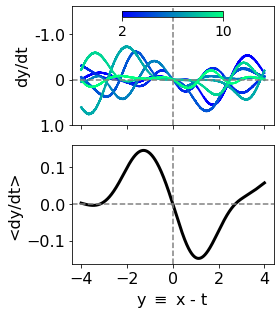

In [15]:
XPL_T = np.linspace(2, 10, 7)
cmap = cm.get_cmap('winter')
colors = [cmap(i) for i in np.linspace(0, 1, len(XPL_T))]

fig, axs = plt.subplots(2, 1, figsize=(4, 4.5), sharex=True, tight_layout=True)
for t_, c in zip(XPL_T, colors):
    it = int(round(t_/DT)+2)
    axs[0].plot(RY, dy_dt[it], c=c, lw=2)
    
im = axs[0].scatter([0, 0], [0, 0], c=[0, 1], s=0, cmap='winter')
cax = inset_axes(axs[0], width="50%", height="5%",  loc='upper center')
    
axs[0].axhline(0, ls='--', c='gray')
axs[0].axvline(0, ls='--', c='gray')

axs[0].set_ylim(-.8, 1.6)
axs[0].set_yticks([-1, 0, 1])
axs[0].set_yticklabels(['1.0', '0', '-1.0'])

axs[0].set_ylabel('dy/dt')

cb = fig.colorbar(im, cax=cax, orientation='horizontal')
cb.set_ticks([0, 1])
cb.set_ticklabels([2, 10])
cb.ax.tick_params(labelsize=14)

axs[1].plot(RY, dy_dt.mean(0), lw=3, c='k')

axs[1].axhline(0, ls='--', c='gray')
axs[1].axvline(0, ls='--', c='gray')

axs[1].set_xlabel('y $\equiv$ x - t')
axs[1].set_ylabel('<dy/dt>')

set_font_size(axs, 16)

fig.savefig('ms/3gh.svg')